# Reconocimiento de números escritos a mano

### Usando TensorFlow

In [2]:
import tensorflow as tf
import random
import numpy as np
import matplotlib.pyplot as plt

In [3]:
(images_train, labels_train), (images_test, labels_test) = tf.keras.datasets.mnist.load_data(path='mnist.npz')

* Las imágenes de entrenamiento de MNIST viven en un espacio vectorial dimensión 784 (28x28)
* El Dataset se puede pensar como 60.000 filas y 784 columnas
* Cada dato del Dataset es un número real entre 0-1 que indica el valor de luz en el pixel

In [4]:
labels_train_encoded = tf.keras.utils.to_categorical(labels_train, num_classes=10)

## Se crea el modelo como una secuencia de capas

*Las redes neuronales, en cada nodo tienen una función de activación que se aplica luego de la operación matemática con los nodos de la capa anterior, es decir

![Proceso de red neuronal](https://upload.wikimedia.org/wikipedia/commons/b/b0/Perceptr%C3%B3n_5_unidades.svg)

![Funciones de activación](https://revistas.uexternado.edu.co/index.php/odeon/article/download/4414/5256/19827)

In [5]:
model1 = tf.keras.Sequential([
    
    tf.keras.layers.Flatten(input_shape=(28, 28)),  #Se aplanan los datos para que sea un vector de 784
    tf.keras.layers.Dense(128, activation='relu'),  #Se elige una capa de 128 nodos con función de activación 'Relu'
    tf.keras.layers.Dense(10)                       #Capa de salida con 10 opciones de clasificación
    
])

model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  #Es la función de pérdidas
              metrics=['accuracy'])

### Se ajusta el modelo con nuestros datos

In [6]:
model1.fit(images_train, labels_train, epochs=7)

Epoch 1/7
1875/1875 [==============================] - 15s 8ms/step - loss: 2.5694 - accuracy: 0.8666E - - ETA: 0s - loss: 2.5775 - accuracy: 0.
Epoch 2/7
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3802 - accuracy: 0.9109 0s -
Epoch 3/7
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2913 - accuracy: 0.9269 0s - loss: 0.2
Epoch 4/7
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2505 - accuracy: 0.9369
Epoch 5/7
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2333 - accuracy: 0.9427
Epoch 6/7
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2207 - accuracy: 0.9450: 0s - los
Epoch 7/7
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1970 - accuracy: 0.9505 3s - loss: - ETA: 2s - loss: 0.195


### Evaluar el modelo

In [7]:
#Para el Training set
test_loss, test_accuracy = model1.evaluate(images_train, labels_train, verbose=2)

1875/1875 - 9s - loss: 0.1496 - accuracy: 0.9577


In [8]:
#Para el Testing set
test_loss, test_accuracy = model1.evaluate(images_test, labels_test, verbose=2)

313/313 - 2s - loss: 0.2477 - accuracy: 0.9455


### Generamos la matriz de predicciones

In [9]:
#Generamos un tensor de predicciones
predictions = tf.keras.Sequential([model1,                     #Capa del modelo
                                  tf.keras.layers.Softmax()])  #Capa final para red neuronal para predecir clases

In [10]:
#Ajustamos el tensor para los datos de training y testing set
predictions_test = predictions.predict(images_test)
predictions_train = predictions.predict(images_train)

### Graficar predicciones Vs. Reales

In [11]:
N = 16
rand_imag_test = random.sample(range(0, len(images_test)), N)
predictions_test = np.argmax(predictions_test, axis=1)

rand_imag_train = random.sample(range(0, len(images_train)), N)
predictions_train = np.argmax(predictions_train, axis=1)

* Para testing set

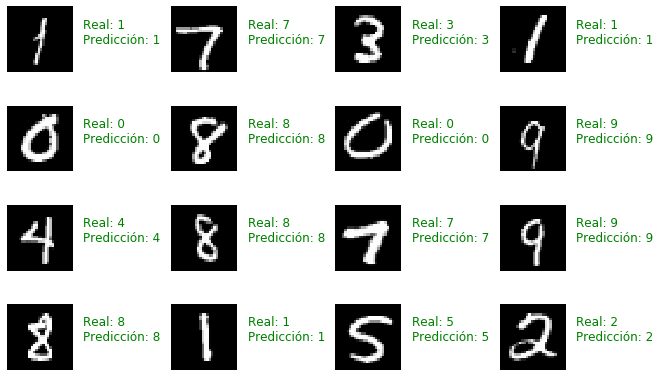

In [12]:
plt.figure(figsize=(10,7))
pos=1

for i in rand_imag_test:
        temp_ = images_test[i]
        val_real = labels_test[i]
        val_predi = predictions_test[i]
        
        plt.subplot(4, 4, pos)
        plt.axis("off")
        plt.imshow(temp_, cmap="gray")
        pos += 1
        
        color_guess = "green" if val_real==val_predi else "red"
        plt.text(32,15, "Real: {0} \nPredicción: {1}".format(val_real, val_predi), fontsize=12, color= color_guess)
        #print("Forma:{0}, min:{1}, max:{2}".format(temp_ima.shape, temp_ima.min(), temp_ima.max()))
        plt.subplots_adjust(wspace=1.5)
plt.show()

* Para testing set

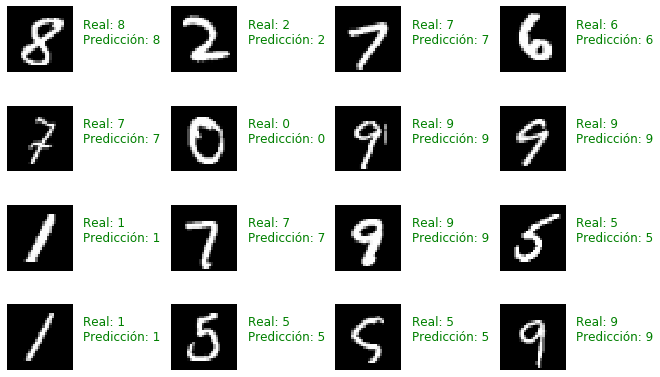

In [13]:
plt.figure(figsize=(10,7))
pos=1

for i in rand_imag_test:
        temp_ = images_train[i]
        val_real = labels_train[i]
        val_predi = predictions_train[i]
        
        plt.subplot(4, 4, pos)
        plt.axis("off")
        plt.imshow(temp_, cmap="gray")
        pos += 1
        
        color_guess = "green" if val_real==val_predi else "red"
        plt.text(32,15, "Real: {0} \nPredicción: {1}".format(val_real, val_predi), fontsize=12, color= color_guess)
        #print("Forma:{0}, min:{1}, max:{2}".format(temp_ima.shape, temp_ima.min(), temp_ima.max()))
        plt.subplots_adjust(wspace=1.5)
plt.show()